In [1]:
# IMPORT LIBRARIES

import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import matplotlib.pyplot as plt
import random

In [2]:
# LOAD DATASET

X_train = np.loadtxt("input.csv", delimiter = ",")
y_train = np.loadtxt("labels.csv", delimiter = ",")


X_test = np.loadtxt("input_test.csv", delimiter = ",")
y_test = np.loadtxt("labels_test.csv", delimiter = ",")

In [3]:
# RESIZING DATA

X_train = X_train.reshape(len(X_train), 100, 100, 3)
y_train = y_train.reshape(len(y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
y_test = y_test.reshape(len(y_test), 1)

X_train = X_train / 255.0
X_test = X_test / 255.0

In [4]:
print("The dimensions of X_train are: ", X_train.shape)
print("The dimensions of y_train are: ", y_train.shape)
print("The dimensions of X_test are: ", X_test.shape)
print("The dimensions of y_test are: ", y_test.shape)

The dimensions of X_train are:  (2000, 100, 100, 3)
The dimensions of y_train are:  (2000, 1)
The dimensions of X_test are:  (400, 100, 100, 3)
The dimensions of y_test are:  (400, 1)


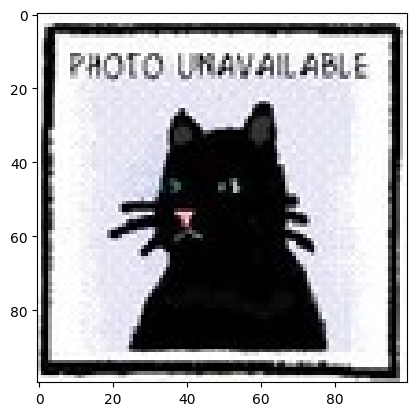

In [5]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

#MODEL

In [6]:
model = Sequential([
    Conv2D(32, (3, 3), activation = "relu", input_shape = (100, 100, 3)),
    MaxPooling2D((2, 2)), 
    
    Conv2D(32, (3, 3), activation = "relu"),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation = "relu"),
    Dense(1, activation = "sigmoid")
])

In [7]:
# opt = tf.keras.optimizers.Adam(learning_rate = 0.01)

model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [12]:
model.fit(X_train, y_train, epochs = 5, batch_size = 64)

Epoch 1/5
32/32 [==============================] - 6s 172ms/step - loss: 0.2058 - accuracy: 0.9225
Epoch 2/5
32/32 [==============================] - 5s 171ms/step - loss: 0.1687 - accuracy: 0.9435
Epoch 3/5
32/32 [==============================] - 6s 173ms/step - loss: 0.1347 - accuracy: 0.9510
Epoch 4/5
32/32 [==============================] - 6s 183ms/step - loss: 0.1006 - accuracy: 0.9685
Epoch 5/5
32/32 [==============================] - 6s 181ms/step - loss: 0.0718 - accuracy: 0.9850


In [13]:
model.evaluate(X_test, y_test)

13/13 [==============================] - 0s 21ms/step - loss: 1.1212 - accuracy: 0.6750


[1.1211555004119873, 0.675000011920929]

MAKING PREDICTIONS

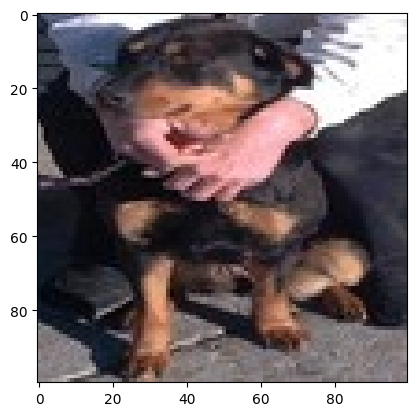

1/1 [==============================] - 0s 82ms/step
Our model is a:  dog


In [10]:
idx2 = random.randint(0, len(X_test))
plt.imshow(X_test[idx2, :])
plt.show()

y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
y_pred = y_pred > 0.5

if y_pred == 1:
    pred = "cat"
else:
    pred = "dog"
    
print("Our model is a: ", pred)